<p style="text-align:center;font-size:32px;">MEMORIA</p>

In [182]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import chi2_contingency


---
### **Objetivo del análisis**  
Un negocio editorial propone un análisis acerca de los títulos que han obtenido algún reconocimiento del público, recibiendo una valoración positiva con los votos emitidos en las diferentes plataformas.

Partiendo de la premisa de que ese reconocimiento obtenido conducirá a una buena cifra de ventas del título, el trabajo consiste en extraer las características externas generales que conducen a lograrlo, más allá de la calidad del contenido, que se da por supuesto.

Para ello se van a analizar las correspondencias que puedan existir entre la variable principal que expone ese reconocimiento ("Reconocimiento") y el resto de variables que puedan intervenir en él.

### **Dataset de trabajo**  
El punto de partida es un dataset que contiene una recomendación de títulos. De todo el campo, el análisis se va a centrar en los títulos publicados entre los años 2000 y 2021.
Aquí se muestra la variación, prácticamente inaprecianble, entre los títulos totales y los publicados en los años establecidos.

In [183]:
# Se lee el archivo principal
df_datab = pd.read_csv("./data/DataBooks.csv")

# Se extraen los títulos entre 2000-2021 (siglo XXI) y se comprueba el contenido
df_databooks = df_datab.loc[(df_datab["Año de publicación"] < 2022)&(df_datab["Año de publicación"] > 1999)]

# Se leen los archivos con los que se trabajará
#df_bsbooks = pd.read_csv("./data/BSBooks.csv")
#df_grbooks = pd.read_csv("./data/GRBooks.csv")
#df_recbooks = pd.read_csv("./data/RECBooks.csv")
#df_21bbooks = pd.read_csv("./data/21BBooks.csv")

---
##### **Variable directora, "Mejor Valorados"** 
La variable directora del estudio será la columna "**Mejor Valorados**", que incluye los títulos con una **nota media superior a 4.0** y un mínimo de **1000 votos**.  
Prácticamente la mitad de los títulos se encuentra en ese rango, y veremos qué características tienen.  
Pero antes, para contrastar la discriminación numérica que vamos a hacer, se revisa la información de la columna "Valor" y se comprueba que el grueso de los títulos guardan una distribución simétrica en torno a la valoración de 4, con algunos títulos destacados en el 5.


In [184]:
# Se revisa la información acerca de los títulos mejor valorados.
df_databooks["Valoración"].describe()

count    8734.000000
mean        3.986061
std         0.344889
min         0.000000
25%         3.790000
50%         3.990000
75%         4.190000
max         5.000000
Name: Valoración, dtype: float64

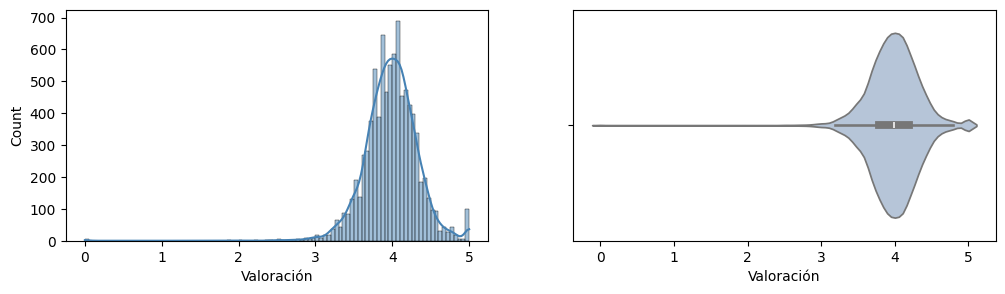

In [157]:
# Se muestra el histoplot de la columna valoración al completo.
fig,axs = plt.subplots(1,2,figsize= (12,3))
sns.histplot(df_databooks["Valoración"],kde=True,color="steelblue",bins=100, ax = axs[0])
sns.violinplot(df_databooks["Valoración"], color="lightsteelblue", orient = "h");

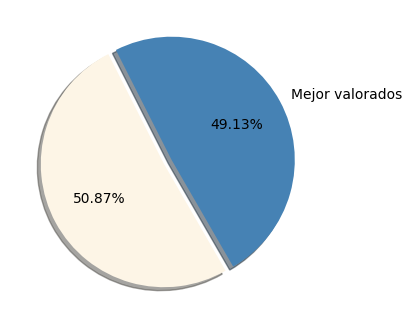

In [4]:
fig, axs = plt.subplots(1,1,figsize=(4,4))
valores = [(df_databooks.loc[(df_databooks["Mejor Valorado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Mejor Valorado"] == False), "Título"].count())]
axs.pie(valores, labels = ["Mejor valorados",""],colors = ["steelblue","oldlace"],autopct='%1.2f%%',explode = (0.07,0), shadow = True, startangle = 300);

---
##### **Relación con variable "Premiados"** 
¿Tiene este valor alguna relación con la variable de premiados?  
Si existiera relación, podría concluirse que los títulos galardonados en algún certámen literario tienen mejor recepción en el público en general, y entonces una de las respuestas a la consulta sería encontrar títulos premiados que aún no tengan editorial con la que publicar el libro (improbable, porque el objetivo de los títulos es precisamente encontrar esos libros de calidad que lanzar al mercado, conforme a los criterios que se establezcan para cada editorial y su certámen), o recomendar la inversión en el lanzamiento de un premio propio de la editorial.


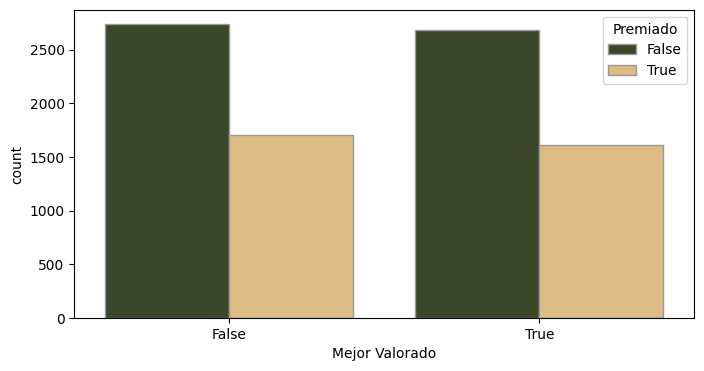

In [180]:
fig, axs = plt.subplots(1,1,figsize=(8,4))
palette = ["#3C4C24", "#EABE77"]
sns.countplot(x = "Mejor Valorado",hue = "Premiado",data = df_databooks.sort_values("Premiado"),edgecolor = "0.6",palette = palette,ax = axs);

Aparentemente guardan la misma relación entre los datos, así que se puede esperar que las variables son independintes entre sí.  
Se visualiza con un gráfico de valores relativos y se aplica la *'prueba de chi cuadrado'* para concluir que, efectivamente, ambas variables on independientes.  

***Conclusión:*** Que un título esté premiado no conduce a una mejor valoración del público, por lo que se descarta proponer la búsqueda de títulos premiados no editados o la creación de un premio editorial perteneciente al sello. 

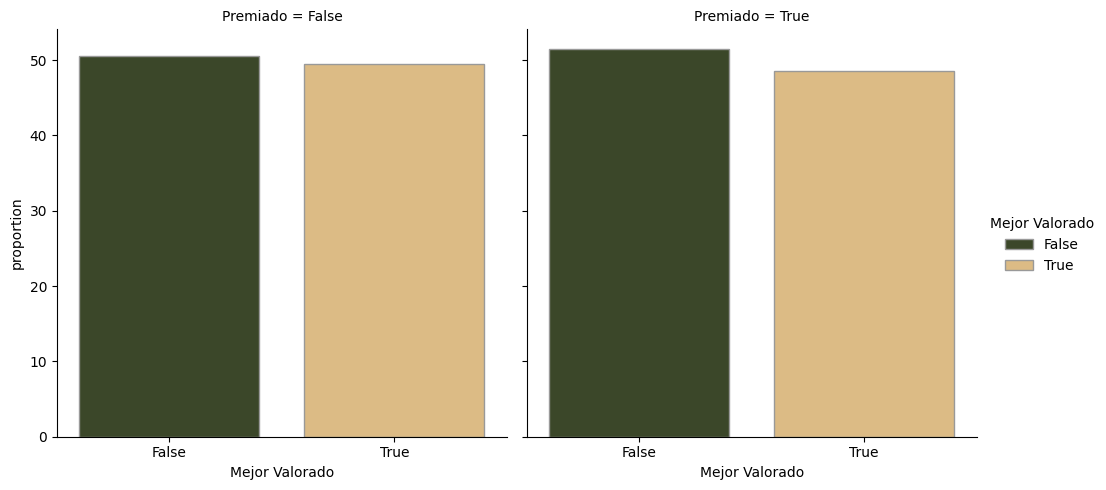

In [95]:
cat_colx = "Mejor Valorado"
cat_coly = "Premiado"
frecuencias_absolutas = df_databooks.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas = df_databooks.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
frecuencias_relativas["proportion"] *= 100
palette = ["#3C4C24", "#EABE77"]
sns.catplot(x="Mejor Valorado",y = "proportion",col="Premiado",hue = "Mejor Valorado",kind = "bar",edgecolor = ".6",data = frecuencias_relativas,palette = palette);

In [55]:
tabla_contingencia = pd.crosstab(df_databooks["Mejor Valorado"], df_databooks["Premiado"])
tabla_contingencia

Premiado,False,True
Mejor Valorado,,
False,2736,1707
True,2684,1607


In [56]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.8306762485835706
P-Value: 0.3620770575573812
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[2757.162812 1685.837188]
 [2662.837188 1628.162812]]


---
##### **Relación con variable "Seriado"** 
Otra variable a tener en cuenta en el estudio es la posibilidad de que se mejore la consideración de los títulos pertenecientes a una serie cuyo éxito inicial alce el resultado en el reconocimiento de todos los títulos de la serie, debido a la creación de una base de lectores fieles que disculpen los altibajos de las diferentes entregas.
Si existiera relación entre ambas, la recomendación sería considerar como objeto de publicación los libros pertenecientes a una serie de cualquier extensión, para asegurar las ventas con las entregas posteriores de la saga.


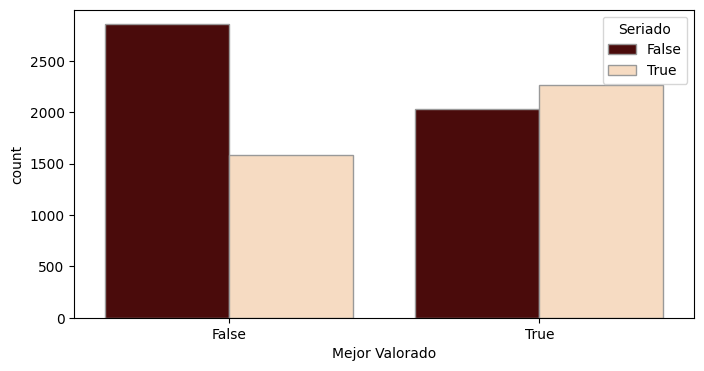

In [163]:
fig, axs = plt.subplots(1,1,figsize=(8,4))
palette = ["#550000","#ffdab9"]
sns.countplot(x = "Mejor Valorado",hue = "Seriado",data = df_databooks.sort_values("Premiado"),palette = palette,ax = axs,edgecolor = "0.6");

En esta relación si hay unos valores que se salen de lo corriente; los títulos que se encuentran entre los mejor valorados tienen un valor alto de ellos que pertenecen a una serie, lo que refuerza el argumento propuesto.  
Como en el caso anterior, se muestra un gráfico con los valores relativos y se analizan los datos con una pruebe de chi cuadrado.

***Conclusión:*** El *'valor p'* en la *'prueba de chi cuadrado'* concluye que las variables sí guardan relación entre sí.  
Se recomienda a la editorial buscar títulos que formen parte (o vayan a formar parte) de una serie que amplíe el relato, para garantizar un mayor número de ventas en caso de éxito.

A partir de este resultado surgen otras preguntas:  
¿Hay algún dato que nos indique que un título será un éxito? o   
¿Se puede extraer más información sobre estos libros para ajustar los parámetros de búsqueda?
La primera pregunta recae de nuevo en la calidad del contenido, que es un parámetro fuera de este análisis. Sin embargo, sí resultaría interesante indagar en lo propuesto en la segunda pregunta.

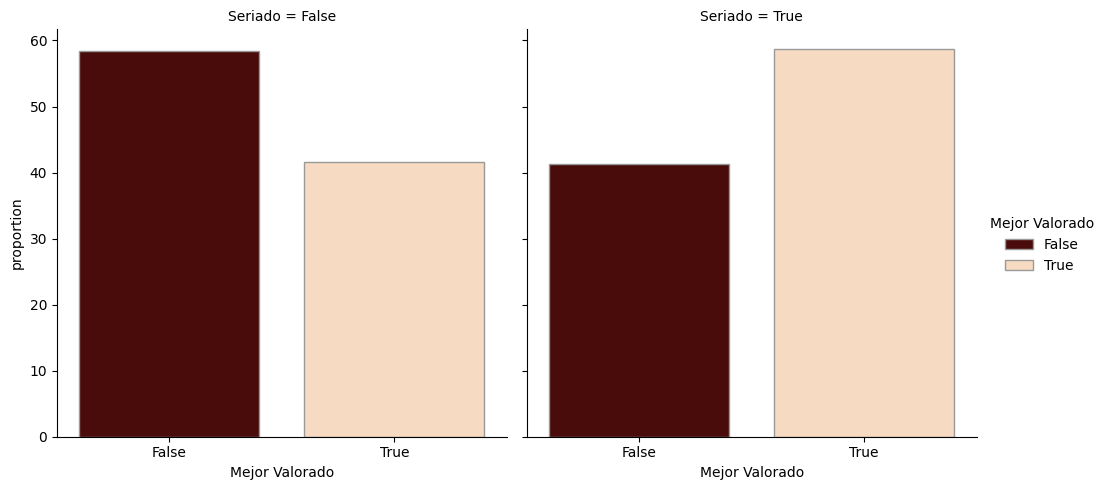

In [161]:
colx = "Mejor Valorado"
cat_coly = "Seriado"
frecuencias_absolutas = df_databooks.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas = df_databooks.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
frecuencias_relativas["proportion"] *= 100
palette = ["#550000","#ffdab9"]
sns.catplot(x="Mejor Valorado",y = "proportion",col="Seriado",hue = "Mejor Valorado",kind="bar",edgecolor=".6",data=frecuencias_relativas,palette=palette);

In [73]:
tabla_contingencia = pd.crosstab(df_databooks["Mejor Valorado"], df_databooks["Seriado"])
tabla_contingencia

Seriado,False,True
Mejor Valorado,,
False,2855,1588
True,2029,2262


In [74]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 254.43377112205144
P-Value: 2.8045993522103574e-57
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[2484.49874055 1958.50125945]
 [2399.50125945 1891.49874055]]


##### **Estudio de variable "Género"** 
¿Se puede determinar que pasan unos años desde la publicación del libro hasta que puede considerarse como un éxito?  
Revisando los datos, puede decirse que es positivo que pasen **entre 7 y 14 años** para que lun título se cuente entre los mejor valorados.  
Los títulos más antiguos quedan relevados por los nuevos, mientras que los más nuevos no cuentan aún con suficiente recorrido editorial como para entrar dentro de la lista de mejores obras.

***Conclusión:*** Se recomienda a la editorial que o bien publique títulos ya asentados en el mercado y que no tengan un acuerdo previo con otra compañía, o bien importe títulos que ya tengan algún bagaje desde su publicación y que aún no se encuentren en el ámbito geográfico de la editorial.
En cualquier caso, debe tener en cuenta que pasarán años entre la primera fecha de publicación y el reconocimiento que se busca con su edición.

##### **Estudio de variable "Año de publicación"** 
¿Se puede determinar que pasan unos años desde la publicación del libro hasta que puede considerarse como un éxito?  
Revisando los datos, puede decirse que es positivo que pasen **entre 7 y 14 años** para que lun título se cuente entre los mejor valorados.  
Los títulos más antiguos quedan relevados por los nuevos, mientras que los más nuevos no cuentan aún con suficiente recorrido editorial como para entrar dentro de la lista de mejores obras.

***Conclusión:*** Se recomienda a la editorial que o bien publique títulos ya asentados en el mercado y que no tengan un acuerdo previo con otra compañía, o bien importe títulos que ya tengan algún bagaje desde su publicación y que aún no se encuentren en el ámbito geográfico de la editorial.
En cualquier caso, debe tener en cuenta que pasarán años entre la primera fecha de publicación y el reconocimiento que se busca con su edición.

In [142]:
promt_total = round(df_databooks["Año de publicación"].max() - df_databooks["Año de publicación"].mean(),1)
print(f"La media de tiempo transcurre entre la publicación y el reconocimiento máximo es de {promt_total} años.")
df_databooks["Año de publicación"].describe()

La media de tiempo transcurre entre la publicación y el reconocimiento máximo es de 10.8 años.


count    8734.000000
mean     2010.213304
std         4.358854
min      2000.000000
25%      2007.000000
50%      2010.000000
75%      2013.000000
max      2021.000000
Name: Año de publicación, dtype: float64

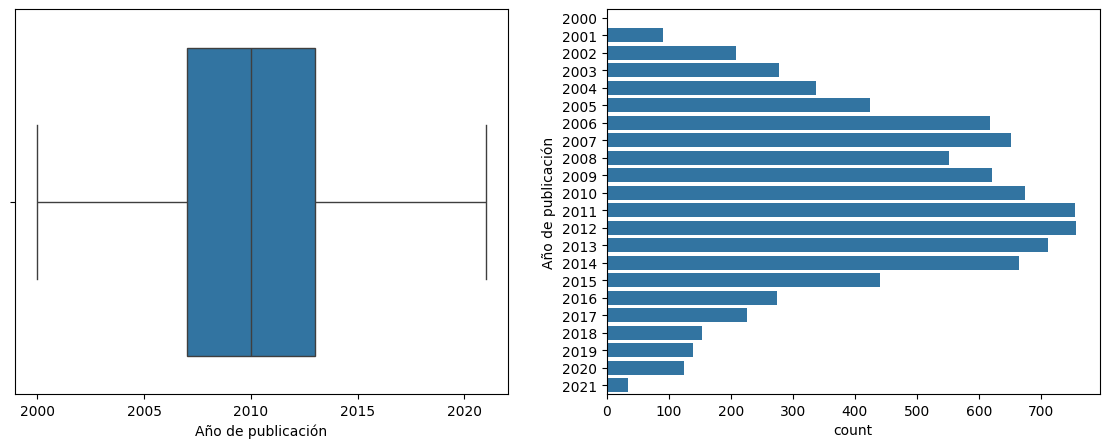

In [128]:
# Año de publicación de los títulos del siglo XXI
fig,axs = plt.subplots(1,2,figsize= (14,5))
sns.boxplot(x = "Año de publicación",data = df_databooks,ax = axs[0])
#sns.histplot(df_databooks["Año de publicación"],kde=True,color="red",bins=21, ax = axs[1])
sns.countplot(df_databooks, y = "Año de publicación", ax = axs[1]);

In [148]:
df = df_databooks.loc[df_databooks["Mejor Valorado"] == True]
promt_esp = round(df["Año de publicación"].max() - df["Año de publicación"].mean(),1)
may_esp = round(df["Año de publicación"].quantile(0.75) - df["Año de publicación"].quantile(0.25),1)
may_espf = round(df["Año de publicación"].max() - df["Año de publicación"].quantile(0.25),1)
may_espi = round(df["Año de publicación"].max() - df["Año de publicación"].quantile(0.75),1)
print(f"La media de tiempo transcurre entre la publicación y el reconocimiento máximo es de {promt_esp} años.")
print(f"La mayoría de títulos mejor valorados se encuentran en un rango de {may_esp} años, entre {may_espi} y {may_espf} años desde la fecha de publicación .")
df["Año de publicación"].describe()

La media de tiempo transcurre entre la publicación y el reconocimiento máximo es de 10.2 años.
La mayoría de títulos mejor valorados se encuentran en un rango de 7.0 años, entre 7.0 y 14.0 años desde la fecha de publicación .


count    4291.000000
mean     2010.780704
std         4.439089
min      2000.000000
25%      2007.000000
50%      2011.000000
75%      2014.000000
max      2021.000000
Name: Año de publicación, dtype: float64

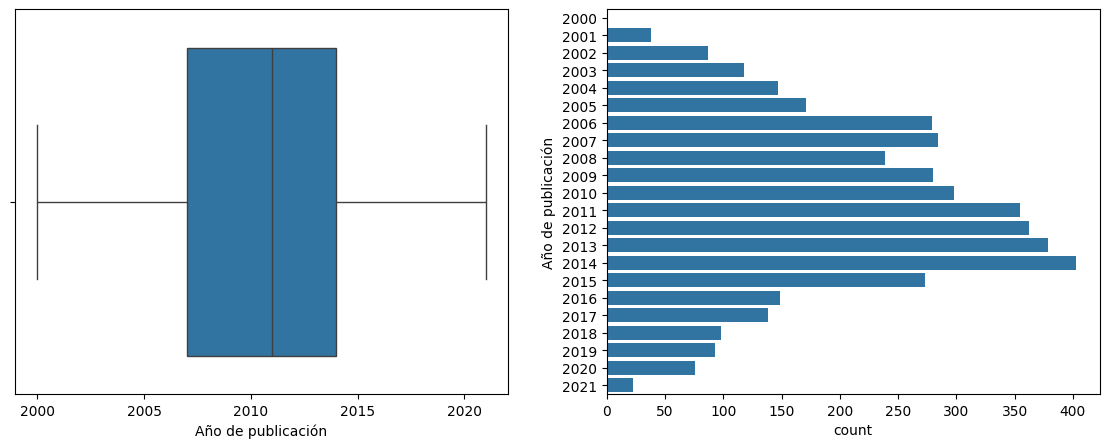

In [129]:
# Año de publicación de los títulos del siglo XXI
fig,axs = plt.subplots(1,2,figsize= (14,5))
sns.boxplot(x = "Año de publicación",data = df,ax = axs[0])
#sns.histplot(df_databooks["Año de publicación"],kde=True,color="red",bins=21, ax = axs[1])
sns.countplot(df, y = "Año de publicación", ax = axs[1]);

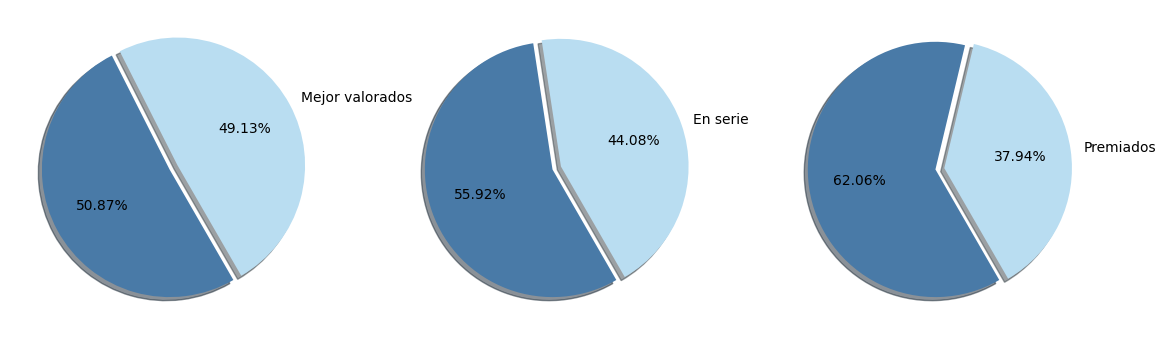

In [25]:
# Se muestra en un gráfico el porcentaje de títulos de cada una de las columnas de éxito
fig, axs = plt.subplots(1,3,figsize=(14, 14))

valores = [(df_databooks.loc[(df_databooks["Premiado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Premiado"] == False), "Título"].count())]
axs[2].pie(valores, labels = ["Premiados",""],colors = ["#B9DDF1","#497AA7"],autopct='%1.2f%%',explode = (0.07,0), shadow = True, startangle = 300);
valores = [(df_databooks.loc[(df_databooks["Mejor Valorado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Mejor Valorado"] == False), "Título"].count())]
axs[0].pie(valores, labels = ["Mejor valorados",""],colors = ["#B9DDF1","#497AA7"],autopct='%1.2f%%',explode = (0.07,0), shadow = True, startangle = 300);
valores = [(df_databooks.loc[(df_databooks["Seriado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Seriado"] == False), "Título"].count())]
axs[1].pie(valores, labels = ["En serie",""],colors = ["#B9DDF1","#497AA7"],autopct='%1.2f%%',explode = (0.07,0), shadow = True, startangle = 300);

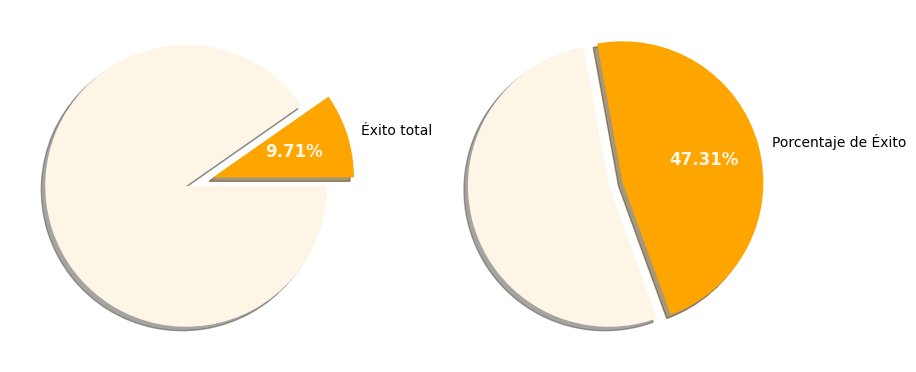

In [41]:
fig, axs = plt.subplots(1,2,figsize=(10, 10))

# Se muestra en un gráfico el porcentaje de títulos que se encuentra en alguna de las tres columnas que determinan el reconocimiento.    
valores = [(df_databooks.loc[(df_databooks["Seriado"] == True)|(df_databooks["Mejor Valorado"] == True)|(df_databooks["Premiado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Seriado"] == False)|(df_databooks["Mejor Valorado"] == False)|(df_databooks["Premiado"] == False), "Título"].count())]
_, _, autopcts = axs[1].pie(valores, labels = ["Porcentaje de Éxito",""],colors = ["orange","oldlace"],autopct = "%1.2f%%",explode = (0.1,0), shadow = True, startangle = 290)
plt.setp(autopcts, **{"color":"#fdf5e6", "weight":"bold", "fontsize":12});

# Se muestra en un gráfico el porcentaje de ´títulos que se encuentra en al menos una de las columnas.    
valores = [(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Mejor Valorado"] == True)&(df_databooks["Premiado"] == True), "Título"].count()),\
          (df_databooks.loc[(df_databooks["Seriado"] == False)|(df_databooks["Mejor Valorado"] == False)|(df_databooks["Premiado"] == False), "Título"].count())]
_, _, autopcts = axs[0].pie(valores, labels = ["Éxito total",""],colors = ["orange","oldlace"],autopct = "%1.2f%%",explode = (0.2,0), shadow = True)
plt.setp(autopcts, **{"color":"#fdf5e6", "weight":"bold", "fontsize":12});

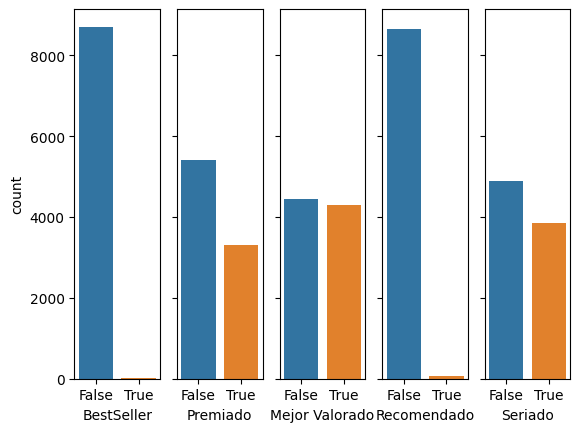

In [8]:

# Se muestran los gráficos de las columnas booleanas
fig,axs = plt.subplots(nrows=1,ncols=5, sharey = True)

sns.countplot(x = "BestSeller", data = df_databooks, ax = axs[0], hue = "BestSeller", legend = False)
sns.countplot(x = "Premiado", data = df_databooks, ax = axs[1], hue = "Premiado", legend = False)
sns.countplot(x = "Mejor Valorado", data = df_databooks, ax = axs[2], hue = "Mejor Valorado", legend = False)
sns.countplot(x = "Recomendado", data = df_databooks, ax = axs[3], hue = "Recomendado", legend = False)
sns.countplot(x = "Seriado", data = df_databooks, ax = axs[4], hue = "Seriado", legend = False);


Se muestra por pantalla el número de 


In [16]:

# ¿Cuántos títulos están contenidos en cada una de las columnas de éxito?
# ¿Y en las tres columnas?
print(f"El número total de títulos que se encuentran presentes en las tres categorías es de {df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Mejor Valorado"] == True)&(df_databooks["Premiado"] == True), "Título"].count()}, sobre un total de {df_databooks["Título"].count()}")
print(f"El número total de títulos que se encuentran presentes en la categoría de Mejor valorados es de {df_databooks.loc[(df_databooks["Mejor Valorado"] == True), "Título"].count()}")
print(f"El número total de títulos que se encuentran presentes en la categoría de Seriados es de {df_databooks.loc[(df_databooks["Seriado"] == True), "Título"].count()}")
print(f"El número total de títulos que se encuentran presentes en la categoría de Premiados es de {df_databooks.loc[(df_databooks["Premiado"] == True), "Título"].count()}")


El número total de títulos que se encuentran presentes en las tres categorías es de 848, sobre un total de 8734
El número total de títulos que se encuentran presentes en la categoría de Mejor valorados es de 4291
El número total de títulos que se encuentran presentes en la categoría de Seriados es de 3850
El número total de títulos que se encuentran presentes en la categoría de Premiados es de 3314


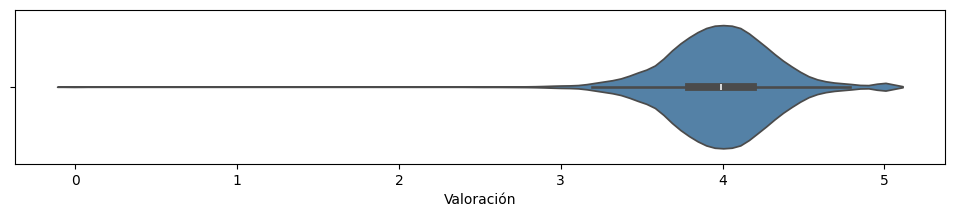

In [236]:
# Analizamos todas las notas
plt.figure(figsize=(12,2))
sns.violinplot(df_databooks["Valoración"], color="steelblue", orient = "h");


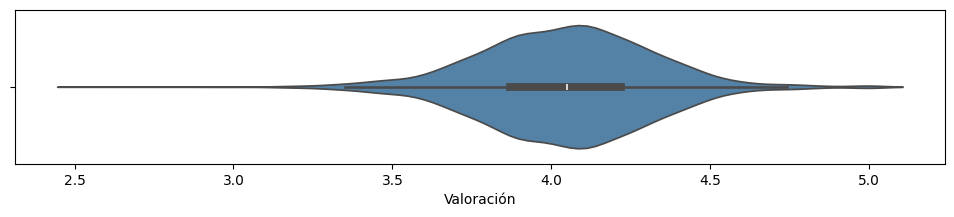

In [240]:
# Analizamos los que pertenecen a una serie
plt.figure(figsize=(12,2))
sns.violinplot(df_databooks.loc[df_databooks["Seriado"] == True, "Valoración"], color="steelblue", orient = "h");


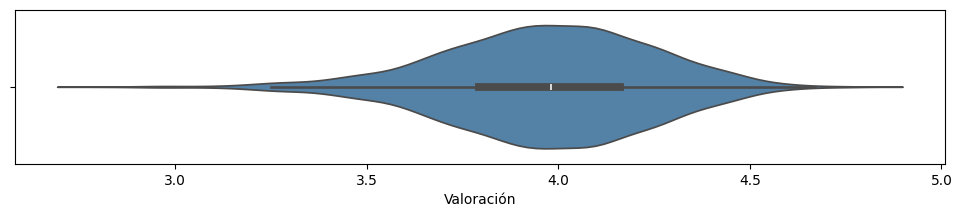

In [239]:
# Analizamos los que pertenecen a títulos premiados
plt.figure(figsize=(12,2))
sns.violinplot(df_databooks.loc[df_databooks["Premiado"] == True, "Valoración"], color="steelblue", orient = "h");


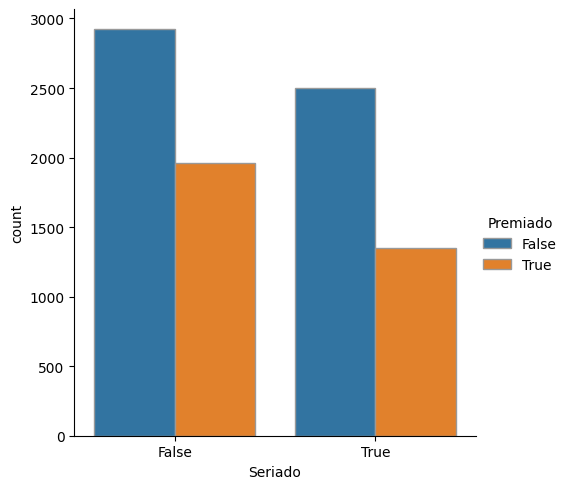

In [244]:
# Comparar dos categóricas, seriados y premiados
sns.catplot(x="Seriado",
            hue="Premiado",
            kind="count",
            edgecolor=".6",
            orient="V",
            data= df_databooks.sort_values("Seriado"));


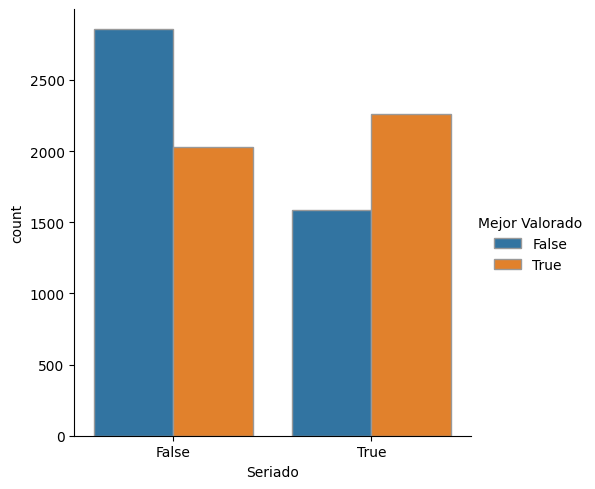

In [245]:
# Comparar dos categóricas, seriados y mejor valorados
sns.catplot(x="Seriado",
            hue="Mejor Valorado",
            kind="count",
            edgecolor=".6",
            orient="V",
            data= df_databooks.sort_values("Seriado"));

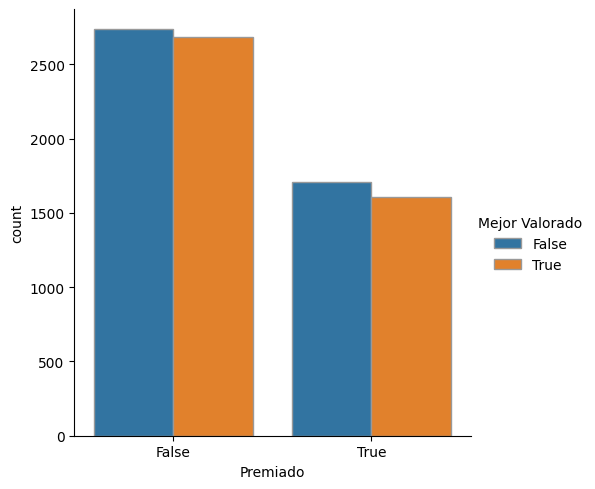

In [246]:
# Comparar dos categóricas, seriados y premiados
sns.catplot(x="Premiado",
            hue="Mejor Valorado",
            kind="count",
            edgecolor=".6",
            orient="V",
            data= df_databooks.sort_values("Premiado"));

In [ ]:
# Quiero ver cuantos seriados hay de género fantástico y de otros géneros
# Quiero ver cuantos mejor valorados hay de ficcion y no ficcion
# Se va a emplear la columna de mejor valorados como directora, enlazando con premiados y seriados
# Hacer una revisión de número de páginas
# Defender que los seriados de fantasía, con una fecha de publicación de 10-12 años son una apuesta segura.


In [150]:
df_databooks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8734 entries, 0 to 8750
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Título                8734 non-null   object 
 1   Serie                 8734 non-null   object 
 2   Autor                 8734 non-null   object 
 3   Género                8734 non-null   object 
 4   Año de publicación    8734 non-null   int64  
 5   Editor                8734 non-null   object 
 6   Páginas               8734 non-null   int64  
 7   BestSeller            8734 non-null   bool   
 8   Premiado              8734 non-null   bool   
 9   Mejor Valorado        8734 non-null   bool   
 10  Recomendado           8734 non-null   bool   
 11  Premios               8734 non-null   object 
 12  Valoración            8734 non-null   float64
 13  Votos                 8734 non-null   object 
 14  Reseñas               8734 non-null   object 
 15  Fecha de publicación  8734

In [247]:
# Se revisan las categorías de género más frecuentes, teniendo en cuenta que algunas están referenciadas en una lista
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Fiction"), "Género"].count()} del género 'Fiction'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Nonfiction"), "Género"].count()} del género 'Nonfiction'")

print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Fantasy"), "Género"].count()} del género 'Fantasy'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Romance"), "Género"].count()} del género 'Romance'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Historic"), "Género"].count()} del género 'Historical'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Mystery"), "Género"].count()} del género 'Mystery'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Science Fiction"), "Género"].count()} del género 'Science Fiction'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Adventure"), "Género"].count()} del género 'Adventure'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Thriller"), "Género"].count()} del género 'Thriller'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Crime"), "Género"].count()} del género 'Crime'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Humor"), "Género"].count()} del género 'Humor'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Poetry"), "Género"].count()} del género 'Poetry'")
print(f"Hay {df_databooks.loc[df_databooks["Género"].str.contains("Classics"), "Género"].count()} del género 'Classics'")


Hay 5810 del género 'Fiction'
Hay 1677 del género 'Nonfiction'
Hay 2840 del género 'Fantasy'
Hay 2135 del género 'Romance'
Hay 1748 del género 'Historical'
Hay 1584 del género 'Mystery'
Hay 1355 del género 'Science Fiction'
Hay 1178 del género 'Adventure'
Hay 1008 del género 'Thriller'
Hay 706 del género 'Crime'
Hay 595 del género 'Humor'
Hay 154 del género 'Poetry'
Hay 104 del género 'Classics'


In [259]:
df_databooks.Autor.value_counts().head(40)

Autor
Lucian Bane               31
Lynsay Sands              26
Stephen King              21
Scott McElhaney           21
Richelle Mead             20
Jim Butcher               19
Victoria Laurie           18
Rick Riordan              18
Charlaine Harris          17
Terry Pratchett           17
Catherine Anderson        16
Byron Goines              16
Kelley Armstrong          16
Cassandra Clare           15
Derek Landy               15
Jeffery Deaver            14
John Flanagan             14
Jodi Picoult              13
Nalini Singh              13
Bernard Cornwell          12
P.C. Cast,Kristin Cast    12
Lee Child                 12
Joe Abercrombie           12
Dean Koontz               12
Sarah J. Maas             11
Ally Carter               11
James Patterson           11
Nicholas Sparks           11
Conn Iggulden             11
Alex Archer,Mel Odom      11
Brandon Sanderson         11
John Sandford             11
Scott Westerfeld          11
Janet Evanovich           11
J.D. Rob

In [260]:
# Buscar si los autores más repetidos son autores de libros seriados
# Comparar número total de autores con número de autores por encima de 10 y número de autores seriados


In [262]:
df_databooks.loc[df_databooks["Seriado"] == True]["Autor"].count()

np.int64(3850)

In [265]:
lista = df_databooks.Autor.unique()
print(len(lista))

5479


In [272]:
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Fantasy"))]["Autor"].count())
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Romance"))]["Autor"].count())
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Historic"))]["Autor"].count())
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Mistery"))]["Autor"].count())
print(df_databooks.loc[(df_databooks["Seriado"] == True)&(df_databooks["Género"].str.contains("Science Fiction"))]["Autor"].count())


2247
1484
609
0
1045


In [249]:
frecuencia = df_databooks["Género"].value_counts()
valores_repetidos = frecuencia[frecuencia > 5]
valores_repetidos

Género
Sin datos                                                                                                                   854
Fiction                                                                                                                      38
Fantasy                                                                                                                      21
Nonfiction                                                                                                                   14
Poetry                                                                                                                       13
Romance                                                                                                                      11
Historical,Historical Fiction                                                                                                 9
Mystery,Fiction,Humor,Womens Fiction,Chick Lit,Romance,Mystery,Crime,Humor,Comedy,Thriller,Myster

In [23]:
df_databooks["Año de publicación"].max()

np.int64(2021)

In [25]:
frecuencia = df_databooks["Editor"].value_counts()
valores_repetidos = frecuencia[frecuencia > 5]
valores_repetidos

Editor
Sin datos                    262
HarperCollins                 94
Little Brown and Company      93
Vintage                       87
St. Martin's Press            85
                            ... 
Shambhala                      6
Hogarth Press                  6
Harcourt Children's Books      6
Eerdmans                       6
Simon Pulse/Mercury Ink        6
Name: count, Length: 282, dtype: int64

In [26]:
df_bsbooks

,Título,Autor,Idioma original,Año de publicación,Ventas,Género
0,A TALE OF TWO CITIES,Charles Dickens,English,1859,>200 million,Historical fiction
1,THE LITTLE PRINCE,Antoine de Saint-Exupéry,French,1943,200 million,"Fantasy, children's fiction"
2,THE ALCHEMIST,Paulo Coelho,Portuguese,1988,150 million,Fantasy
3,HARRY POTTER AND THE PHILOSOPHER'S STONE,J. K. Rowling,English,1997,120 million,"Fantasy, children's fiction"
4,AND THEN THERE WERE NONE,Agatha Christie,English,1939,100 million,Mystery
...,...,...,...,...,...,...
160,FAHRENHEIT 451,Ray Bradbury,English,1953,10 million,NaN
161,ANGELA'S ASHES,Frank McCourt,English,1996,10 million,NaN
162,THE STORY OF MY EXPERIMENTS WITH TRUTH,Mohandas Karamchand Gandhi,Gujarati,1925–1929,10 million,NaN
163,BRIDGET JONES'S DIARY,Helen Fielding,English,1996,10 million,NaN


In [29]:
frecuencia = df_bsbooks["Género"].value_counts()
valores_repetidos = frecuencia[frecuencia > 0]
valores_repetidos

Género
Novel                            9
Children's literature            7
Self-help                        6
Fantasy, children's fiction      5
Children's fiction               3
                                ..
Historical fiction, war novel    1
Science fiction                  1
Dystopian fiction                1
Horror                           1
Romance, Fiction                 1
Name: count, Length: 76, dtype: int64